**Inicio Colab**


In [1]:
# Monto drive en colab
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [2]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

**--- Fin Colab ---**

In [3]:
import sys
sys.path.insert(1, '../FeatureEngineering')

import pandas as pd
import numpy as np
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from keras.preprocessing import sequence
from tensorflow import keras
from tensorflow.keras import layers
from gensim.models import KeyedVectors
from keras.preprocessing.text import Tokenizer
from keras.models import Sequential
from keras.layers import Dense, Conv1D, Flatten, MaxPooling1D, Embedding, GlobalMaxPooling1D, Dropout, LSTM,Input,Activation
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import nltk
from sklearn.metrics import f1_score
import feature_builder
import util
import hyperparameter_tuning
embeddings = None
from hyperopt import hp,STATUS_OK

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
Using TensorFlow backend.


**Spliteo para obtener vectores de train y test**

In [4]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
Y = train_df['target'].values

In [5]:
def prepare_for_lstm(df):
    processed = feature_builder.process_dataset(df,encoding_type='mean')
    return (processed, processed.to_numpy().reshape(processed.shape[0], 1, processed.shape[1]))

**Proceso el set de entrenamiento entero**

In [6]:
processed, X_processed = prepare_for_lstm(train_df)

/content


/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:254: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


Embeddings loaded!
Percentage of words covered in the embeddings = 0.4937444933920705
Embeddings loaded!
Percentage of words covered in the embeddings = 0.5879980378263476


**Hago split con train test split**

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X_processed,Y,test_size = 0.33,random_state = 17)

**Armo el modelo de LSTM y lo compilo**

In [22]:
def LSTM():
    model = tf.keras.Sequential([
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(512),input_shape=(X_train.shape[1], X_train.shape[2])),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(0.6924965129234393),
    tf.keras.layers.Dense(1)])
    return model

In [23]:
model = LSTM()
model.summary()
model.compile(loss=keras.losses.BinaryCrossentropy(from_logits=True),
              optimizer=keras.optimizers.Adam(1e-4),
              metrics=['accuracy'])

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional_2 (Bidirection (None, 1024)              4694016   
_________________________________________________________________
dense_4 (Dense)              (None, 32)                32800     
_________________________________________________________________
dropout_2 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 33        
Total params: 4,726,849
Trainable params: 4,726,849
Non-trainable params: 0
_________________________________________________________________


**Entro el modelo y predigo**

In [24]:
history = model.fit(X_train, y_train, epochs=50, shuffle=True, validation_split=0.2)

Epoch 1/50
128/128 [==============================] - 8s 66ms/step - loss: 0.6629 - accuracy: 0.5880 - val_loss: 0.6500 - val_accuracy: 0.5284
Epoch 2/50
128/128 [==============================] - 7s 57ms/step - loss: 0.6244 - accuracy: 0.6145 - val_loss: 0.6294 - val_accuracy: 0.5461
Epoch 3/50
128/128 [==============================] - 7s 57ms/step - loss: 0.6109 - accuracy: 0.6245 - val_loss: 0.6087 - val_accuracy: 0.5657
Epoch 4/50
128/128 [==============================] - 7s 58ms/step - loss: 0.5819 - accuracy: 0.6598 - val_loss: 0.5942 - val_accuracy: 0.6137
Epoch 5/50
128/128 [==============================] - 7s 58ms/step - loss: 0.5640 - accuracy: 0.6767 - val_loss: 0.5865 - val_accuracy: 0.6167
Epoch 6/50
128/128 [==============================] - 7s 58ms/step - loss: 0.5433 - accuracy: 0.6995 - val_loss: 0.5497 - val_accuracy: 0.7020
Epoch 7/50
128/128 [==============================] - 7s 58ms/step - loss: 0.5229 - accuracy: 0.7154 - val_loss: 0.5336 - val_accuracy: 0.7216

In [25]:
prediction = model.predict_classes(X_test)
f1 = f1_score(y_test, prediction,average=None)
mean_f1 = (f1[0] + f1[1]) / 2
mean_f1

0.811970245624748

**Vamos a probar epochs con 30 y 100 para ver como varia el f1**

In [31]:
model_30 = LSTM()
model_30.summary()
model_30.compile(loss=keras.losses.BinaryCrossentropy(from_logits=True),
              optimizer=keras.optimizers.Adam(1e-4),
              metrics=['accuracy'])

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional_5 (Bidirection (None, 1024)              4694016   
_________________________________________________________________
dense_10 (Dense)             (None, 32)                32800     
_________________________________________________________________
dropout_5 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 33        
Total params: 4,726,849
Trainable params: 4,726,849
Non-trainable params: 0
_________________________________________________________________


In [32]:
history = model_30.fit(X_train, y_train, epochs=30, shuffle=True, validation_split=0.2)

Epoch 1/30
128/128 [==============================] - 8s 62ms/step - loss: 0.6627 - accuracy: 0.5887 - val_loss: 0.6513 - val_accuracy: 0.5265
Epoch 2/30
128/128 [==============================] - 7s 57ms/step - loss: 0.6268 - accuracy: 0.5988 - val_loss: 0.6346 - val_accuracy: 0.5431
Epoch 3/30
128/128 [==============================] - 7s 57ms/step - loss: 0.6133 - accuracy: 0.6137 - val_loss: 0.6255 - val_accuracy: 0.5333
Epoch 4/30
128/128 [==============================] - 7s 57ms/step - loss: 0.5903 - accuracy: 0.6431 - val_loss: 0.6055 - val_accuracy: 0.5539
Epoch 5/30
128/128 [==============================] - 7s 56ms/step - loss: 0.5676 - accuracy: 0.6561 - val_loss: 0.5814 - val_accuracy: 0.6490
Epoch 6/30
128/128 [==============================] - 7s 56ms/step - loss: 0.5552 - accuracy: 0.6917 - val_loss: 0.5858 - val_accuracy: 0.6098
Epoch 7/30
128/128 [==============================] - 7s 55ms/step - loss: 0.5398 - accuracy: 0.6956 - val_loss: 0.5459 - val_accuracy: 0.7000

In [36]:
prediction = model_30.predict_classes(X_test)
f1 = f1_score(y_test, prediction,average=None)
mean_f1 = (f1[0] + f1[1]) / 2
mean_f1

0.7875958604766224

In [37]:
model_100 = LSTM()
model_100.summary()
model_100.compile(loss=keras.losses.BinaryCrossentropy(from_logits=True),
              optimizer=keras.optimizers.Adam(1e-4),
              metrics=['accuracy'])

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional_7 (Bidirection (None, 1024)              4694016   
_________________________________________________________________
dense_14 (Dense)             (None, 32)                32800     
_________________________________________________________________
dropout_7 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 33        
Total params: 4,726,849
Trainable params: 4,726,849
Non-trainable params: 0
_________________________________________________________________


In [38]:
history = model_100.fit(X_train, y_train, epochs=100, shuffle=True, validation_split=0.2)

Epoch 1/100
128/128 [==============================] - 8s 63ms/step - loss: 0.6660 - accuracy: 0.5929 - val_loss: 0.6533 - val_accuracy: 0.5265
Epoch 2/100
128/128 [==============================] - 7s 57ms/step - loss: 0.6283 - accuracy: 0.5919 - val_loss: 0.6387 - val_accuracy: 0.5275
Epoch 3/100
128/128 [==============================] - 7s 57ms/step - loss: 0.6069 - accuracy: 0.6228 - val_loss: 0.6150 - val_accuracy: 0.5824
Epoch 4/100
128/128 [==============================] - 8s 59ms/step - loss: 0.5843 - accuracy: 0.6429 - val_loss: 0.6000 - val_accuracy: 0.5941
Epoch 5/100
128/128 [==============================] - 7s 58ms/step - loss: 0.5702 - accuracy: 0.6757 - val_loss: 0.5794 - val_accuracy: 0.6471
Epoch 6/100
128/128 [==============================] - 7s 58ms/step - loss: 0.5507 - accuracy: 0.6885 - val_loss: 0.5539 - val_accuracy: 0.7098
Epoch 7/100
128/128 [==============================] - 7s 58ms/step - loss: 0.5310 - accuracy: 0.7179 - val_loss: 0.5365 - val_accuracy:

In [39]:
prediction = model_100.predict_classes(X_test)
f1 = f1_score(y_test, prediction,average=None)
mean_f1 = (f1[0] + f1[1]) / 2
mean_f1

0.7992033084597074

**Búsqueda de hiperparámetros con Hyperopt (bayesian)**

In [ ]:
space = {'units': hp.choice('units',[16,32,64,128,256,512]),
        'units2': hp.choice('units2',[16,32,64,128,256,512]),
        'dropout': hp.uniform('dropout',0,1),
        'activation': hp.choice('activation',['relu','sigmoid'])
        }

In [ ]:
def lstm(params):
  with tf.device('/GPU:0'):
    print("Probando parametros: ")
    print("units: %s, units2: %s, dropout: %s, activation: %s" % (params['units'],params['units2'],params['dropout'],params['activation']))
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(params['units']),input_shape=(X_train.shape[1], X_train.shape[2])))
    model.add(tf.keras.layers.Dense(params['units2'], activation=params['activation']))
    model.add(tf.keras.layers.Dropout(params['dropout']))
    model.add(tf.keras.layers.Dense(1))

    model.compile(loss=keras.losses.BinaryCrossentropy(from_logits=True),
              optimizer=keras.optimizers.Adam(1e-4),
              metrics=['accuracy'])
    
    result = model.fit(X_train, y_train, epochs=50, shuffle=True, validation_split=0.2,verbose=0)
    prediction = model.predict_classes(X_test)
    f1 = f1_score(y_test, prediction,average=None)
    mean_f1 = (f1[0] + f1[1]) / 2
    mean_f1
    print('\nScore:',mean_f1)
    return {'loss': -mean_f1, 'status': STATUS_OK, 'model': model}


**Voy a probar si llega a 200 evaluaciones ya que con 300 en gru fallo**

In [ ]:
import importlib
importlib.reload(hyperparameter_tuning)
hyperparameter_tuning.bayesian_optimization(lstm,space,max_evals=200)

Probando parametros: 
units: 128, units2: 64, dropout: 0.16357487915871027, activation: relu
  0%|          | 0/200 [00:06<?, ?it/s, best loss: ?]WARNING:tensorflow:From <ipython-input-21-fcac981c0b61>:16: Sequential.predict_classes (from tensorflow.python.keras.engine.sequential) is deprecated and will be removed after 2021-01-01.
Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).

Score:
0.8087350151825066
Probando parametros: 
units: 32, units2: 16, dropout: 0.7974174459330854, activation: relu

Score:
0.718505792696357
Probando parametros: 
units: 256, units2: 32, dropout: 0.8765639368433183, activation: relu

Score:
0.8092851507127765
Probando parametros: 
units: 256, units2: 16, dropout: 0.125962528568

**Como No llego a 200,voy a probar menos iteraciones para poder tener un ejemplo del grafico de bayes**

Probando parametros: 
units: 128, units2: 64, dropout: 0.0663793310389944, activation: relu
  0%|          | 0/30 [00:00<?, ?it/s, best loss: ?]WARNING:tensorflow:From <ipython-input-11-fcac981c0b61>:16: Sequential.predict_classes (from tensorflow.python.keras.engine.sequential) is deprecated and will be removed after 2021-01-01.
Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).

Score:
0.8012108763281274
Probando parametros: 
units: 128, units2: 128, dropout: 0.7911798959021372, activation: relu

Score:
0.8072959973055751
Probando parametros: 
units: 64, units2: 256, dropout: 0.040521794682099155, activation: relu

Score:
0.8050609758587042
Probando parametros: 
units: 64, units2: 128, dropout: 0.872365931

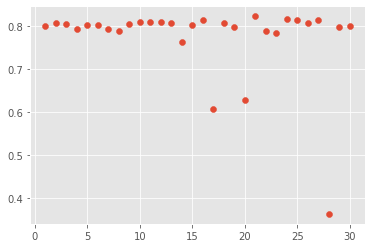

In [ ]:
import importlib
importlib.reload(hyperparameter_tuning)
hyperparameter_tuning.bayesian_optimization(lstm,space,max_evals=30)

Podemos ver que los mejores parametros son los siguientes:

units: 512<br>
units2: 32<br>
dropout: 0.6924965129234393<br>
activation: relu<br>

**Export para kaggle**

En este caso notamos que para los epochs de 30,50 y 100 tienen resultados de 0.80723,0.80784 y 0.79957 respectivamente, por lo que utilizaremos un epoch de 50 para validar este modelo en kaggle, igual que paso con gru

In [42]:
y_train = train_df['target'].values

In [43]:
def LSTM():
    model = tf.keras.Sequential([
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(512),input_shape=(X_processed.shape[1], X_processed.shape[2])),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(0.6924965129234393),
    tf.keras.layers.Dense(1)])
    return model

In [44]:
model = LSTM()
model.summary()
model.compile(loss=keras.losses.BinaryCrossentropy(from_logits=True),
              optimizer=keras.optimizers.Adam(1e-4),
              metrics=['accuracy'])

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional_5 (Bidirection (None, 1024)              4694016   
_________________________________________________________________
dense_10 (Dense)             (None, 32)                32800     
_________________________________________________________________
dropout_5 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 33        
Total params: 4,726,849
Trainable params: 4,726,849
Non-trainable params: 0
_________________________________________________________________


In [45]:
history = model.fit(X_processed,y_train,epochs = 50, shuffle= False, validation_split =0.0)

Epoch 1/50
238/238 [==============================] - 1s 4ms/step - loss: 0.6705 - accuracy: 0.5701
Epoch 2/50
238/238 [==============================] - 1s 4ms/step - loss: 0.6475 - accuracy: 0.5705
Epoch 3/50
238/238 [==============================] - 1s 4ms/step - loss: 0.6324 - accuracy: 0.5743
Epoch 4/50
238/238 [==============================] - 1s 4ms/step - loss: 0.6166 - accuracy: 0.5819
Epoch 5/50
238/238 [==============================] - 1s 4ms/step - loss: 0.5990 - accuracy: 0.6132
Epoch 6/50
238/238 [==============================] - 1s 4ms/step - loss: 0.5742 - accuracy: 0.6490
Epoch 7/50
238/238 [==============================] - 1s 4ms/step - loss: 0.5496 - accuracy: 0.6830
Epoch 8/50
238/238 [==============================] - 1s 4ms/step - loss: 0.5335 - accuracy: 0.7020
Epoch 9/50
238/238 [==============================] - 1s 4ms/step - loss: 0.5200 - accuracy: 0.7163
Epoch 10/50
238/238 [==============================] - 1s 4ms/step - loss: 0.5113 - accuracy: 0.7290

In [46]:
ids = test_df['id']

processed, final_test = prepare_for_lstm(test_df)
prediction = model.predict_classes(final_test)

final_df = pd.DataFrame({'target': [x[0] for x in prediction]}, index=ids)
final_df

/content/gdrive/My Drive/UBA/Orga de Datos/tp2-datos/Modelos
Embeddings loaded!
Percentage of words covered in the embeddings = 0.5707598689343111
Embeddings loaded!
Percentage of words covered in the embeddings = 0.6603057058767683


,target
id,
0,1
2,1
3,1
9,1
11,1
...,...
10861,1
10865,1
10868,1


In [47]:
final_df['target'].value_counts()

0    2132
1    1131
Name: target, dtype: int64

In [48]:
final_df.to_csv('lstm.csv')